In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def getTokens(review):
  stop_words = set(stopwords.words('english'))
  return [word.lower() for word in word_tokenize(review) if word not in string.punctuation and word.lower() not in stop_words and word.isalpha()]

In [ ]:
import string

def preprocess(df):
  vocab = []
  tokenized_reviews = []
  for review in df['REVIEW_TEXT']:
    tokens = getTokens(review)
    vocab.extend(tokens)
    tokenized_reviews.append(tokens)
  vocab = list(set(vocab))
  return tokenized_reviews, vocab

In [ ]:
import numpy as np

def bagOfWords(tokenized_reviews, vocab):
  bag = []
  for review in tokenized_reviews:
    bag_vector = np.zeros(len(vocab))
    for w in review:
      if w in vocab:
        bag_vector[vocab.index(w)] += 1
    bag.append(bag_vector)
  return np.array(bag)

In [ ]:
def giveVectorsForALabel(label, ratings):
  positions = []
  for i in range(len(ratings)):
    if ratings[i] == label: 
      positions.append(i) 
  return findVectorsInLabel(positions) 

In [ ]:
def findVectorsInLabel(positions):
  vectors = []
  features = bag
  for i in positions:
    vectors.append(features[i])  
  return vectors

In [ ]:
def getWordProb(label, word):
  i = vocab.index(word)
  freq = 0
  for vector in vectors[label-1]:
    freq += vector[i] 
  return freq / sums[label-1]

In [ ]:
def getClassProb(label, reviewTokens):
  prob = 1
  for word in reviewTokens:
    prob *= getWordProb(label, word)  
  return prob

In [ ]:
def naiveBayes(reviewTokens):
  probs = []
  for i in range(1, 6):
    probs.append(getClassProb(i, reviewTokens))
  return probs.index(max(probs)) + 1 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_reviews.csv to amazon_reviews.csv


In [ ]:
import pandas as pd
df = pd.read_csv('amazon_reviews.csv', sep = '\t')

In [ ]:
req_data = df[['RATING', 'REVIEW_TEXT']]
tokenized_reviews, vocab = preprocess(req_data)

[Text(0, 0.5, 'No. of reviews'), Text(0.5, 0, 'Rating')]

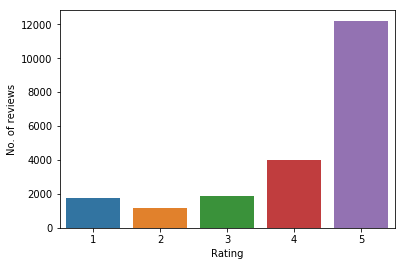

In [ ]:
import seaborn as sb
plot = sb.countplot(x = req_data['RATING'], data = req_data)
plot.set(xlabel = 'Rating', ylabel = 'No. of reviews')

In [ ]:
bag = bagOfWords(tokenized_reviews, vocab)
np.save('reviewVectors.npy', bag)

In [ ]:
prob1 = req_data['RATING'][req_data['RATING'] == 1].count()/len(req_data)
prob2 = req_data['RATING'][req_data['RATING'] == 2].count()/len(req_data)
prob3 = req_data['RATING'][req_data['RATING'] == 3].count()/len(req_data)
prob4 = req_data['RATING'][req_data['RATING'] == 4].count()/len(req_data)
prob5 = req_data['RATING'][req_data['RATING'] == 5].count()/len(req_data)
class_probs = np.array([prob1, prob2, prob3, prob4, prob5])

In [ ]:
vectorsOf1 = giveVectorsForALabel(1, req_data['RATING'])
vectorsOf2 = giveVectorsForALabel(2, req_data['RATING'])
vectorsOf3 = giveVectorsForALabel(3, req_data['RATING'])
vectorsOf4 = giveVectorsForALabel(4, req_data['RATING'])
vectorsOf5 = giveVectorsForALabel(5, req_data['RATING'])
vectors = np.array([vectorsOf1, vectorsOf2, vectorsOf3, vectorsOf4, vectorsOf5])

In [ ]:
sumOf1 = sum([sum(i) for i in vectorsOf1])
sumOf2 = sum([sum(i) for i in vectorsOf2])
sumOf3 = sum([sum(i) for i in vectorsOf3])
sumOf4 = sum([sum(i) for i in vectorsOf4])
sumOf5 = sum([sum(i) for i in vectorsOf5])
sums = np.array([sumOf1, sumOf2, sumOf3, sumOf4, sumOf5])

In [ ]:
import random

list_ratio = [(75,25) , (60,40) , (50,50)]

ratio = random.choice(list_ratio)
  
train_elements = req_data.sample(frac = ratio[0]/100)
test_elements = req_data.sample(frac = ratio[1]/100)
train_index_list = train_elements.index
test_index_list = test_elements.index
curBag = [bag[i] for i in train_index_list[:1000]]
predictions = [naiveBayes(getTokens(req_data['REVIEW_TEXT'][i])) for i in test_index_list[:1000]]

c = 0
j = 0
for i in test_index_list[:1000]:
  if predictions[j] == req_data['RATING'][i]:
    c += 1
  j += 1
  
print(c/len(test_index_list[:1000]))

0.805


In [ ]:
a_review = "I simply loved the product"
reviewTokens = getTokens(a_review)
print("Rating:", naiveBayes(reviewTokens))

Rating: 5
